In [3]:
import os
import matplotlib.pyplot as plt
from notebooks.visualization.activations_funcs import get_activation_dictionnary
from notebooks.visualization.random_networks_plots.plot_config import apply_plot_style
from notebooks.visualization.activations_funcs import get_all_connections
from paths import PROJECT_ROOT
plots_dir = os.path.join(PROJECT_ROOT, "plots")
from notebooks.visualization.random_networks_plots.plot_config import RANDOMIZATION_NAMES
NUM_PASSES = 3

apply_plot_style()

# Create plots directory if it doesn't exist
os.makedirs(plots_dir, exist_ok=True)

In [4]:

from utils.helpers import load_neuron_coordinates

from joblib import Memory


cache_dir = os.path.join(PROJECT_ROOT, "notebooks", "visualization", "data", ".joblib_cache")
memory = Memory(location=cache_dir, verbose=0)


@memory.cache
def connections_cached():
    """Disk-cached version of get_all_connections()."""
    return get_all_connections()


@memory.cache
def activations_cached(num_passes: int = 4):
    """Disk-cached wrapper around get_activation_dictionnary()."""
    conn_dict = connections_cached()
    return get_activation_dictionnary(conn_dict, num_passes)

neuron_position_data = load_neuron_coordinates()

# Heavy cached computations
connections_dict = connections_cached()
activations_dict = activations_cached(NUM_PASSES)

# remove Unconstrained from both
connections_dict.pop(RANDOMIZATION_NAMES["random_pruned"])
activations_dict.pop(RANDOMIZATION_NAMES["random_pruned"])


,root_id,input,activation_1,activation_2,activation_3
0,720575940596125868,0.0,0.0,0.287547,-85.819054
1,720575940597856265,0.0,0.0,-0.487498,59.954024
2,720575940597944841,0.0,0.0,2.203463,-209.451150
3,720575940598267657,0.0,0.0,0.080413,-156.998509
4,720575940599333574,0.0,0.0,0.000000,86.802121
...,...,...,...,...,...
138634,720575940625653391,0.0,0.0,0.000000,0.000000
138635,720575940605399520,0.0,0.0,0.000000,0.000000
138636,720575940633343825,0.0,0.0,0.000000,0.000000
138637,720575940627437572,0.0,0.0,0.000000,0.350477


# Panel A

/home/eudald/Escriptori/doctorat/connectome/notebooks/visualization/random_networks_plots/synapse_distributions.py:139: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


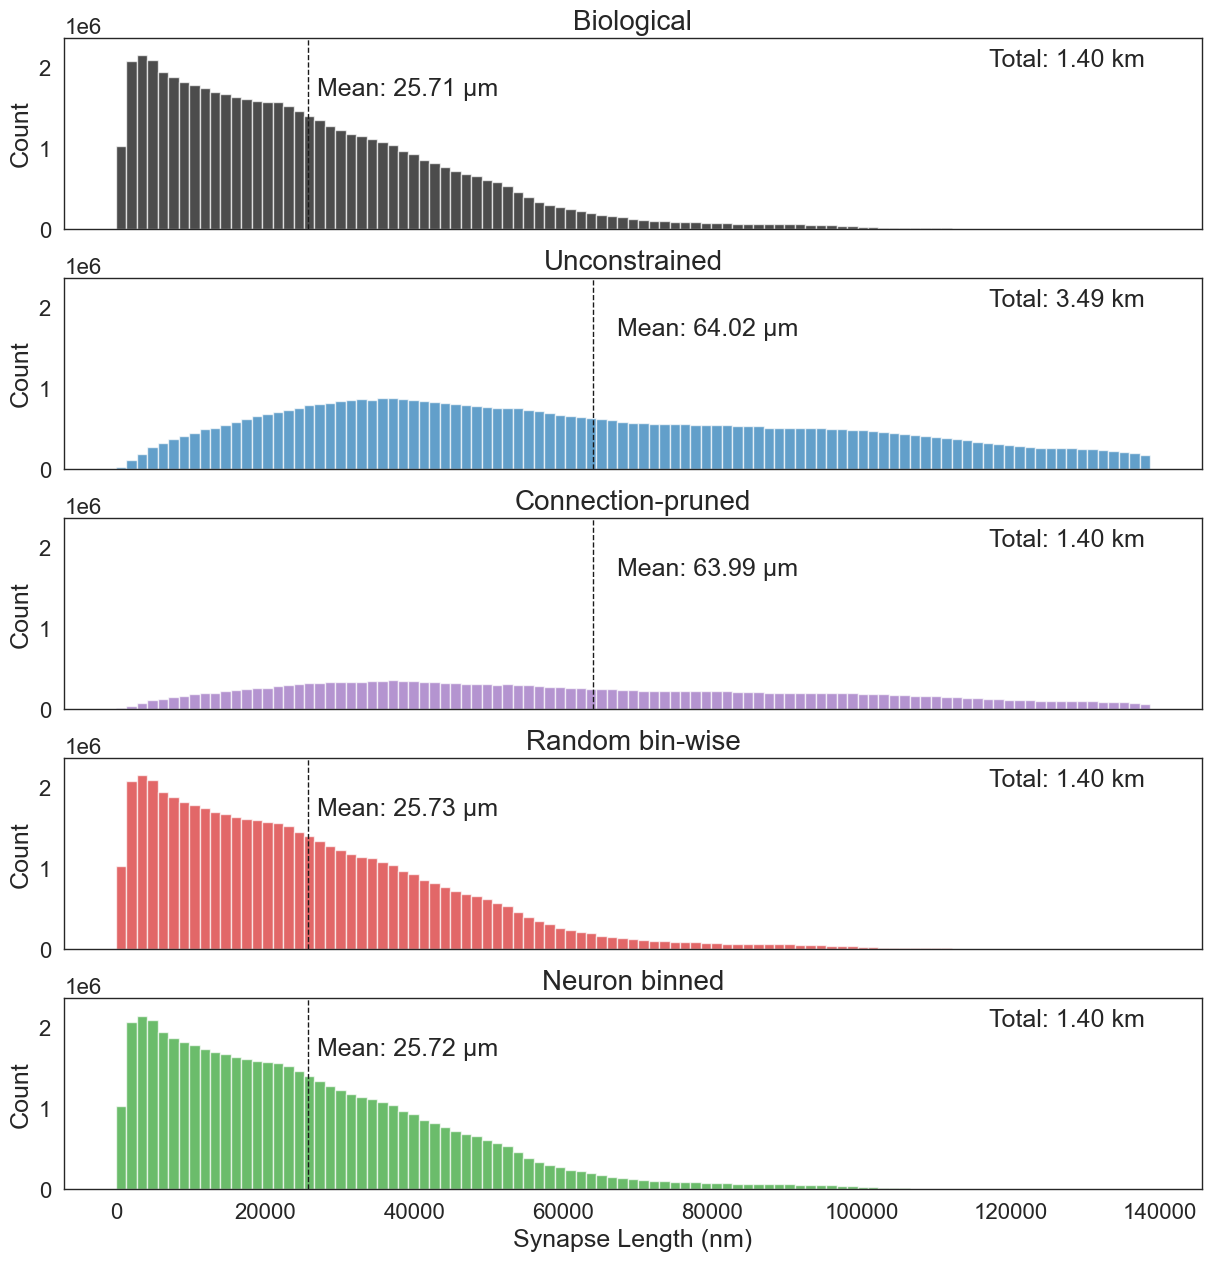

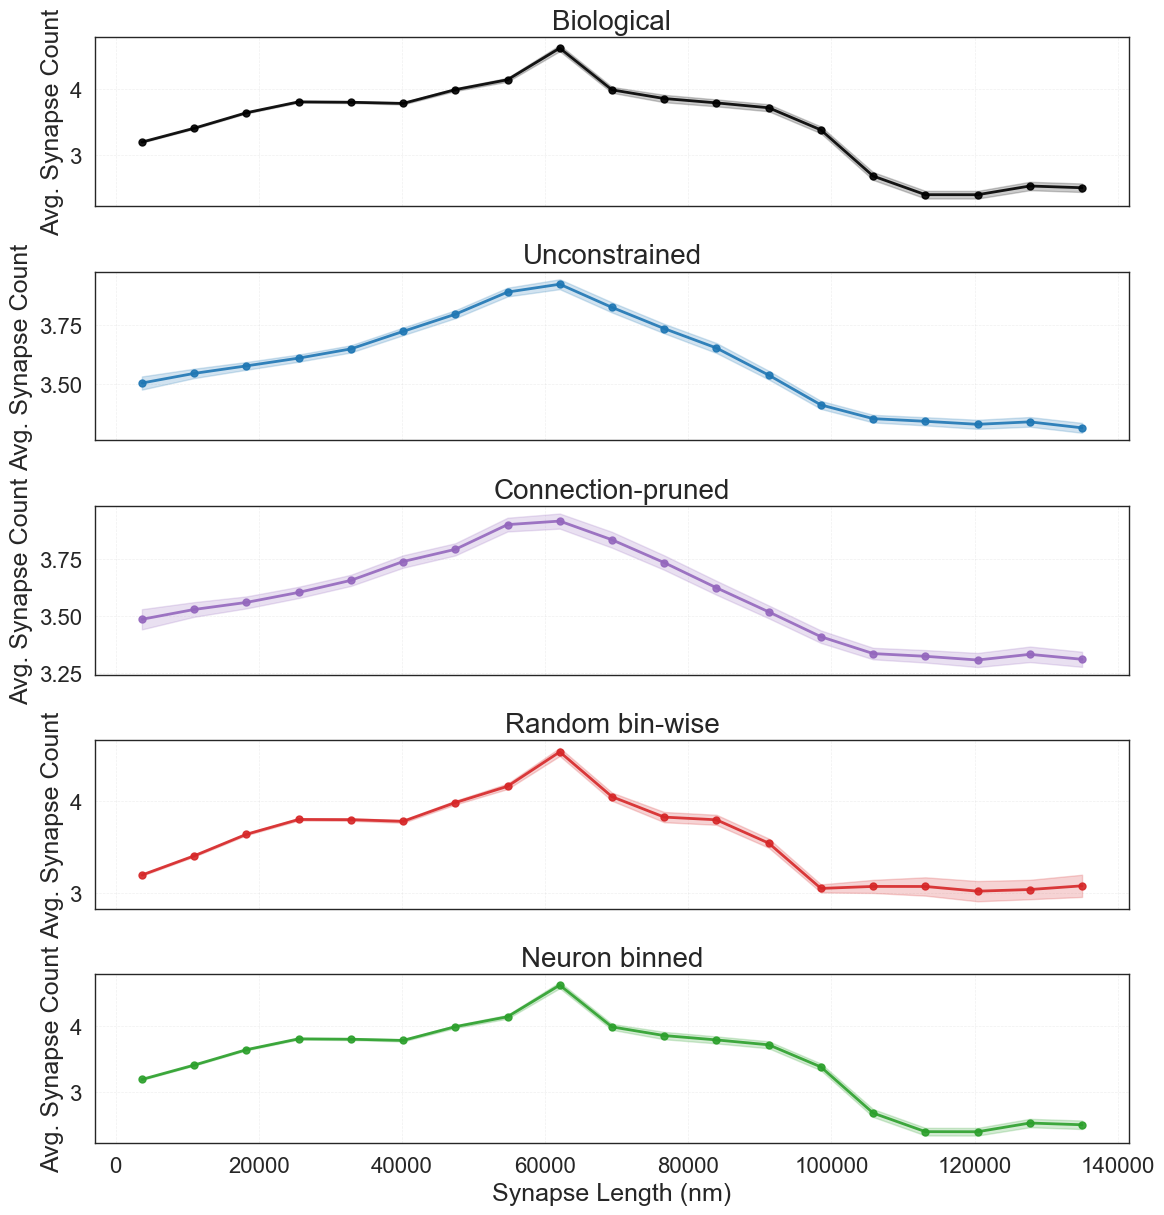

In [5]:
import importlib
from notebooks.visualization.random_networks_plots import activation_plots
importlib.reload(activation_plots)
from notebooks.visualization.random_networks_plots.synapse_distributions import plot_synapse_length_distributions

figa1, figa2 = plot_synapse_length_distributions(neuron_position_data, connections_dict, use_density=False, num_confidence_interval_se=2)

figa1.savefig(os.path.join(plots_dir, "synapse_length_distributions.png"),
            dpi=300, bbox_inches="tight", transparent=True)
figa1.savefig(os.path.join(plots_dir, "synapse_length_distributions.pdf"),
            bbox_inches="tight")

figa2.savefig(os.path.join(plots_dir, "synapse_count_per_length.png"),
            dpi=300, bbox_inches="tight", transparent=True)
figa2.savefig(os.path.join(plots_dir, "synapse_count_per_length.pdf"),
            bbox_inches="tight")


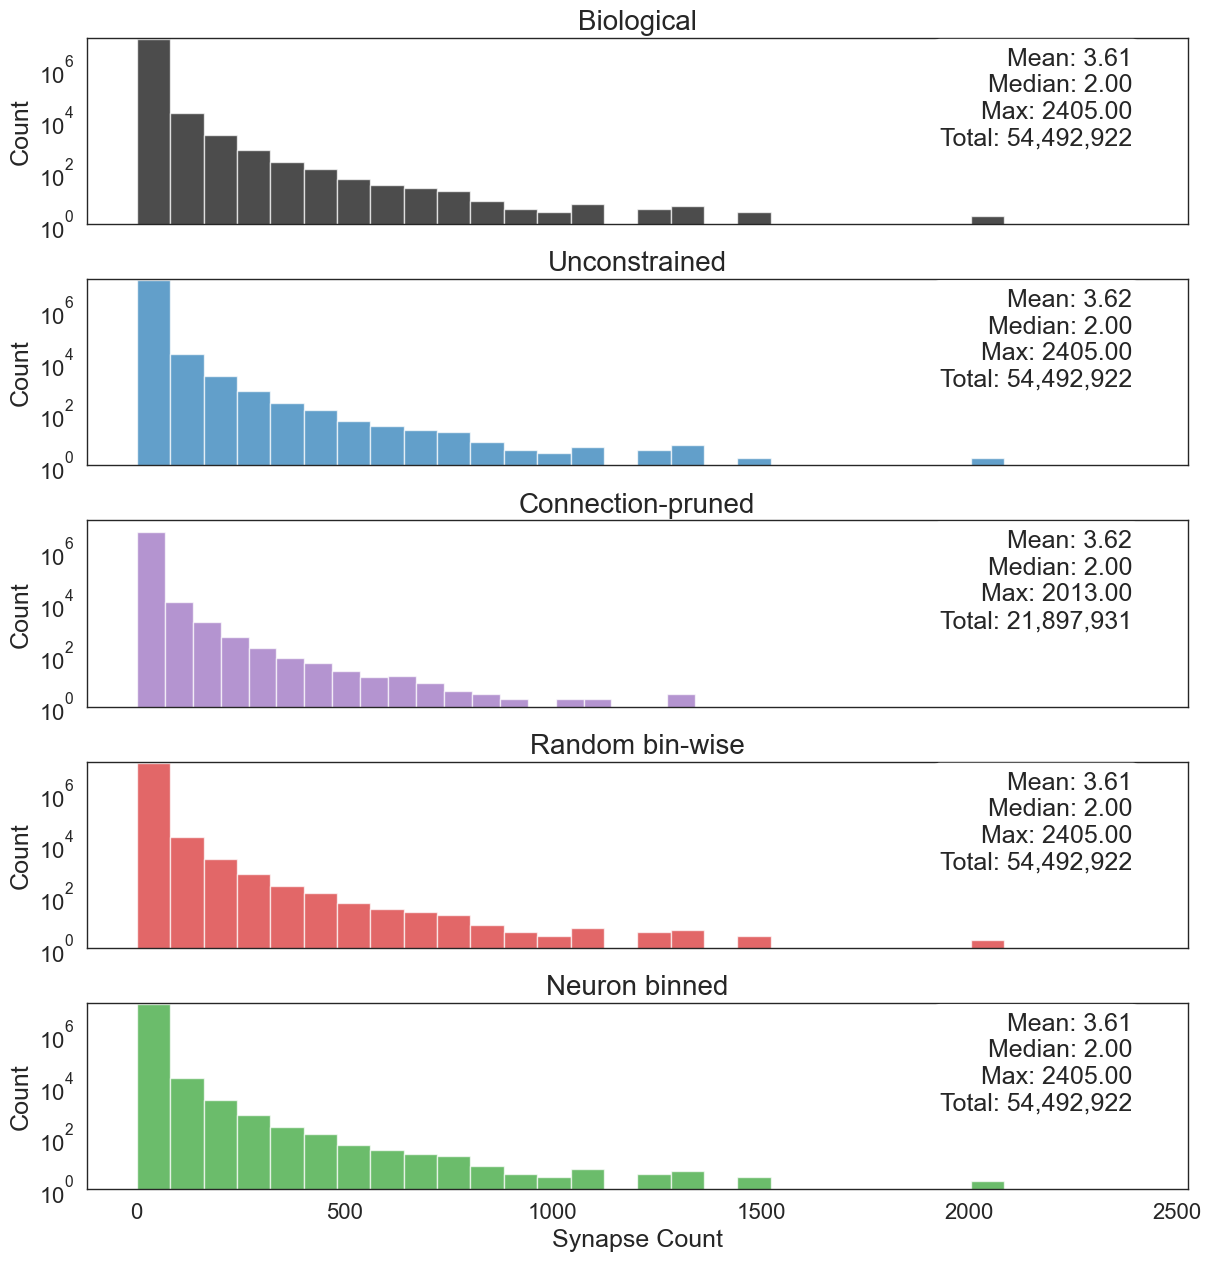

In [6]:
import importlib
from notebooks.visualization.random_networks_plots import synapse_distributions
importlib.reload(synapse_distributions)
from notebooks.visualization.random_networks_plots.synapse_distributions import plot_synapse_counts_histogram

fig = plot_synapse_counts_histogram(connections_dict, log_scale=True)
fig.savefig(os.path.join(plots_dir, "synapse_counts_histogram.png"),
            dpi=300, bbox_inches="tight", transparent=True)
fig.savefig(os.path.join(plots_dir, "synapse_counts_histogram.pdf"),
            bbox_inches="tight")

# Panel b

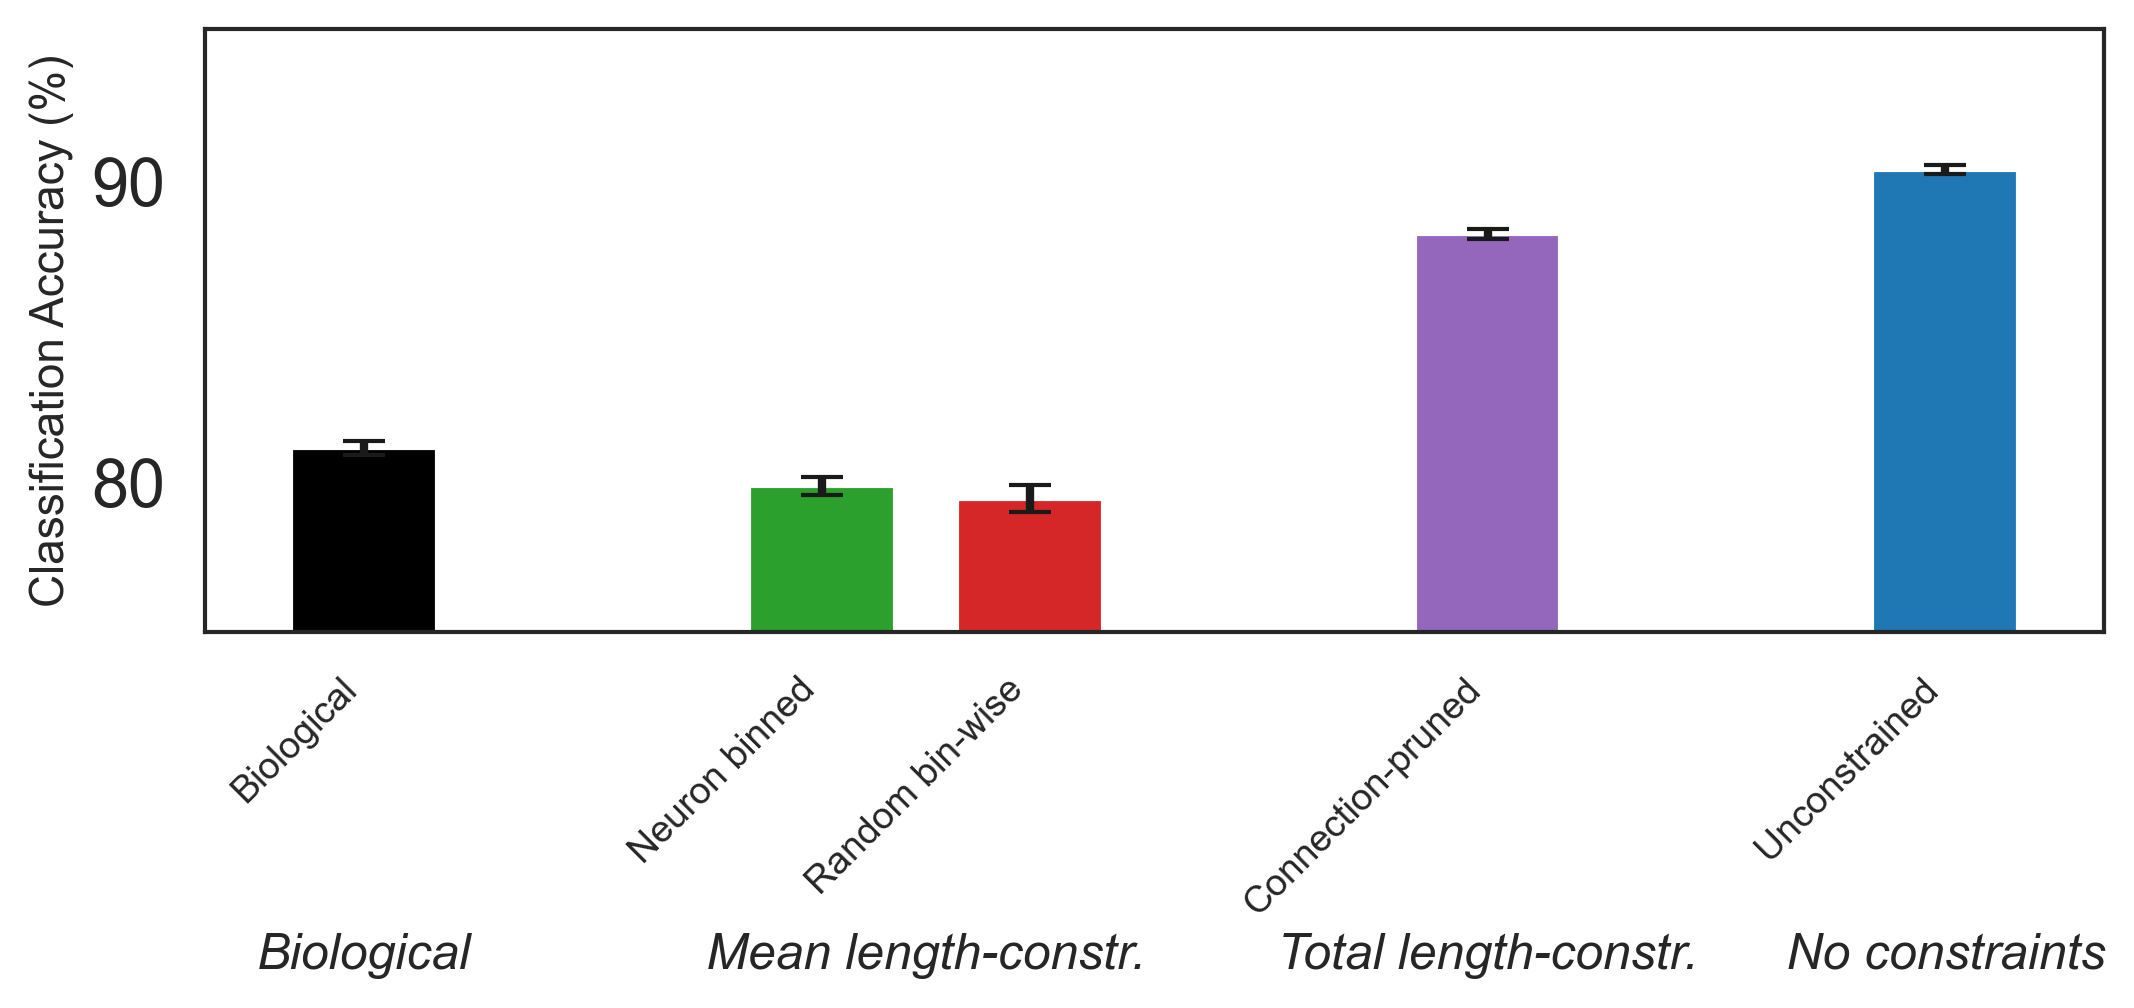

In [8]:
import pandas as pd
# reimport the module to avoid caching issues
import importlib
from notebooks.visualization.random_networks_plots import models_accuracy
importlib.reload(models_accuracy)

from notebooks.visualization.random_networks_plots.models_accuracy import grouped_accuracy_comparison_4groups

csv_path = "notebooks/visualization/data/randomizations_seeds.csv"
df = pd.read_csv(csv_path, dtype=str)


figb = grouped_accuracy_comparison_4groups(df)

plt.savefig(os.path.join(plots_dir,"efficiency_comparison.png"), dpi=300, bbox_inches="tight", transparent=True)
plt.savefig(os.path.join(plots_dir,"efficiency_comparison.pdf"), bbox_inches="tight") 
plt.show()

# Pancel c

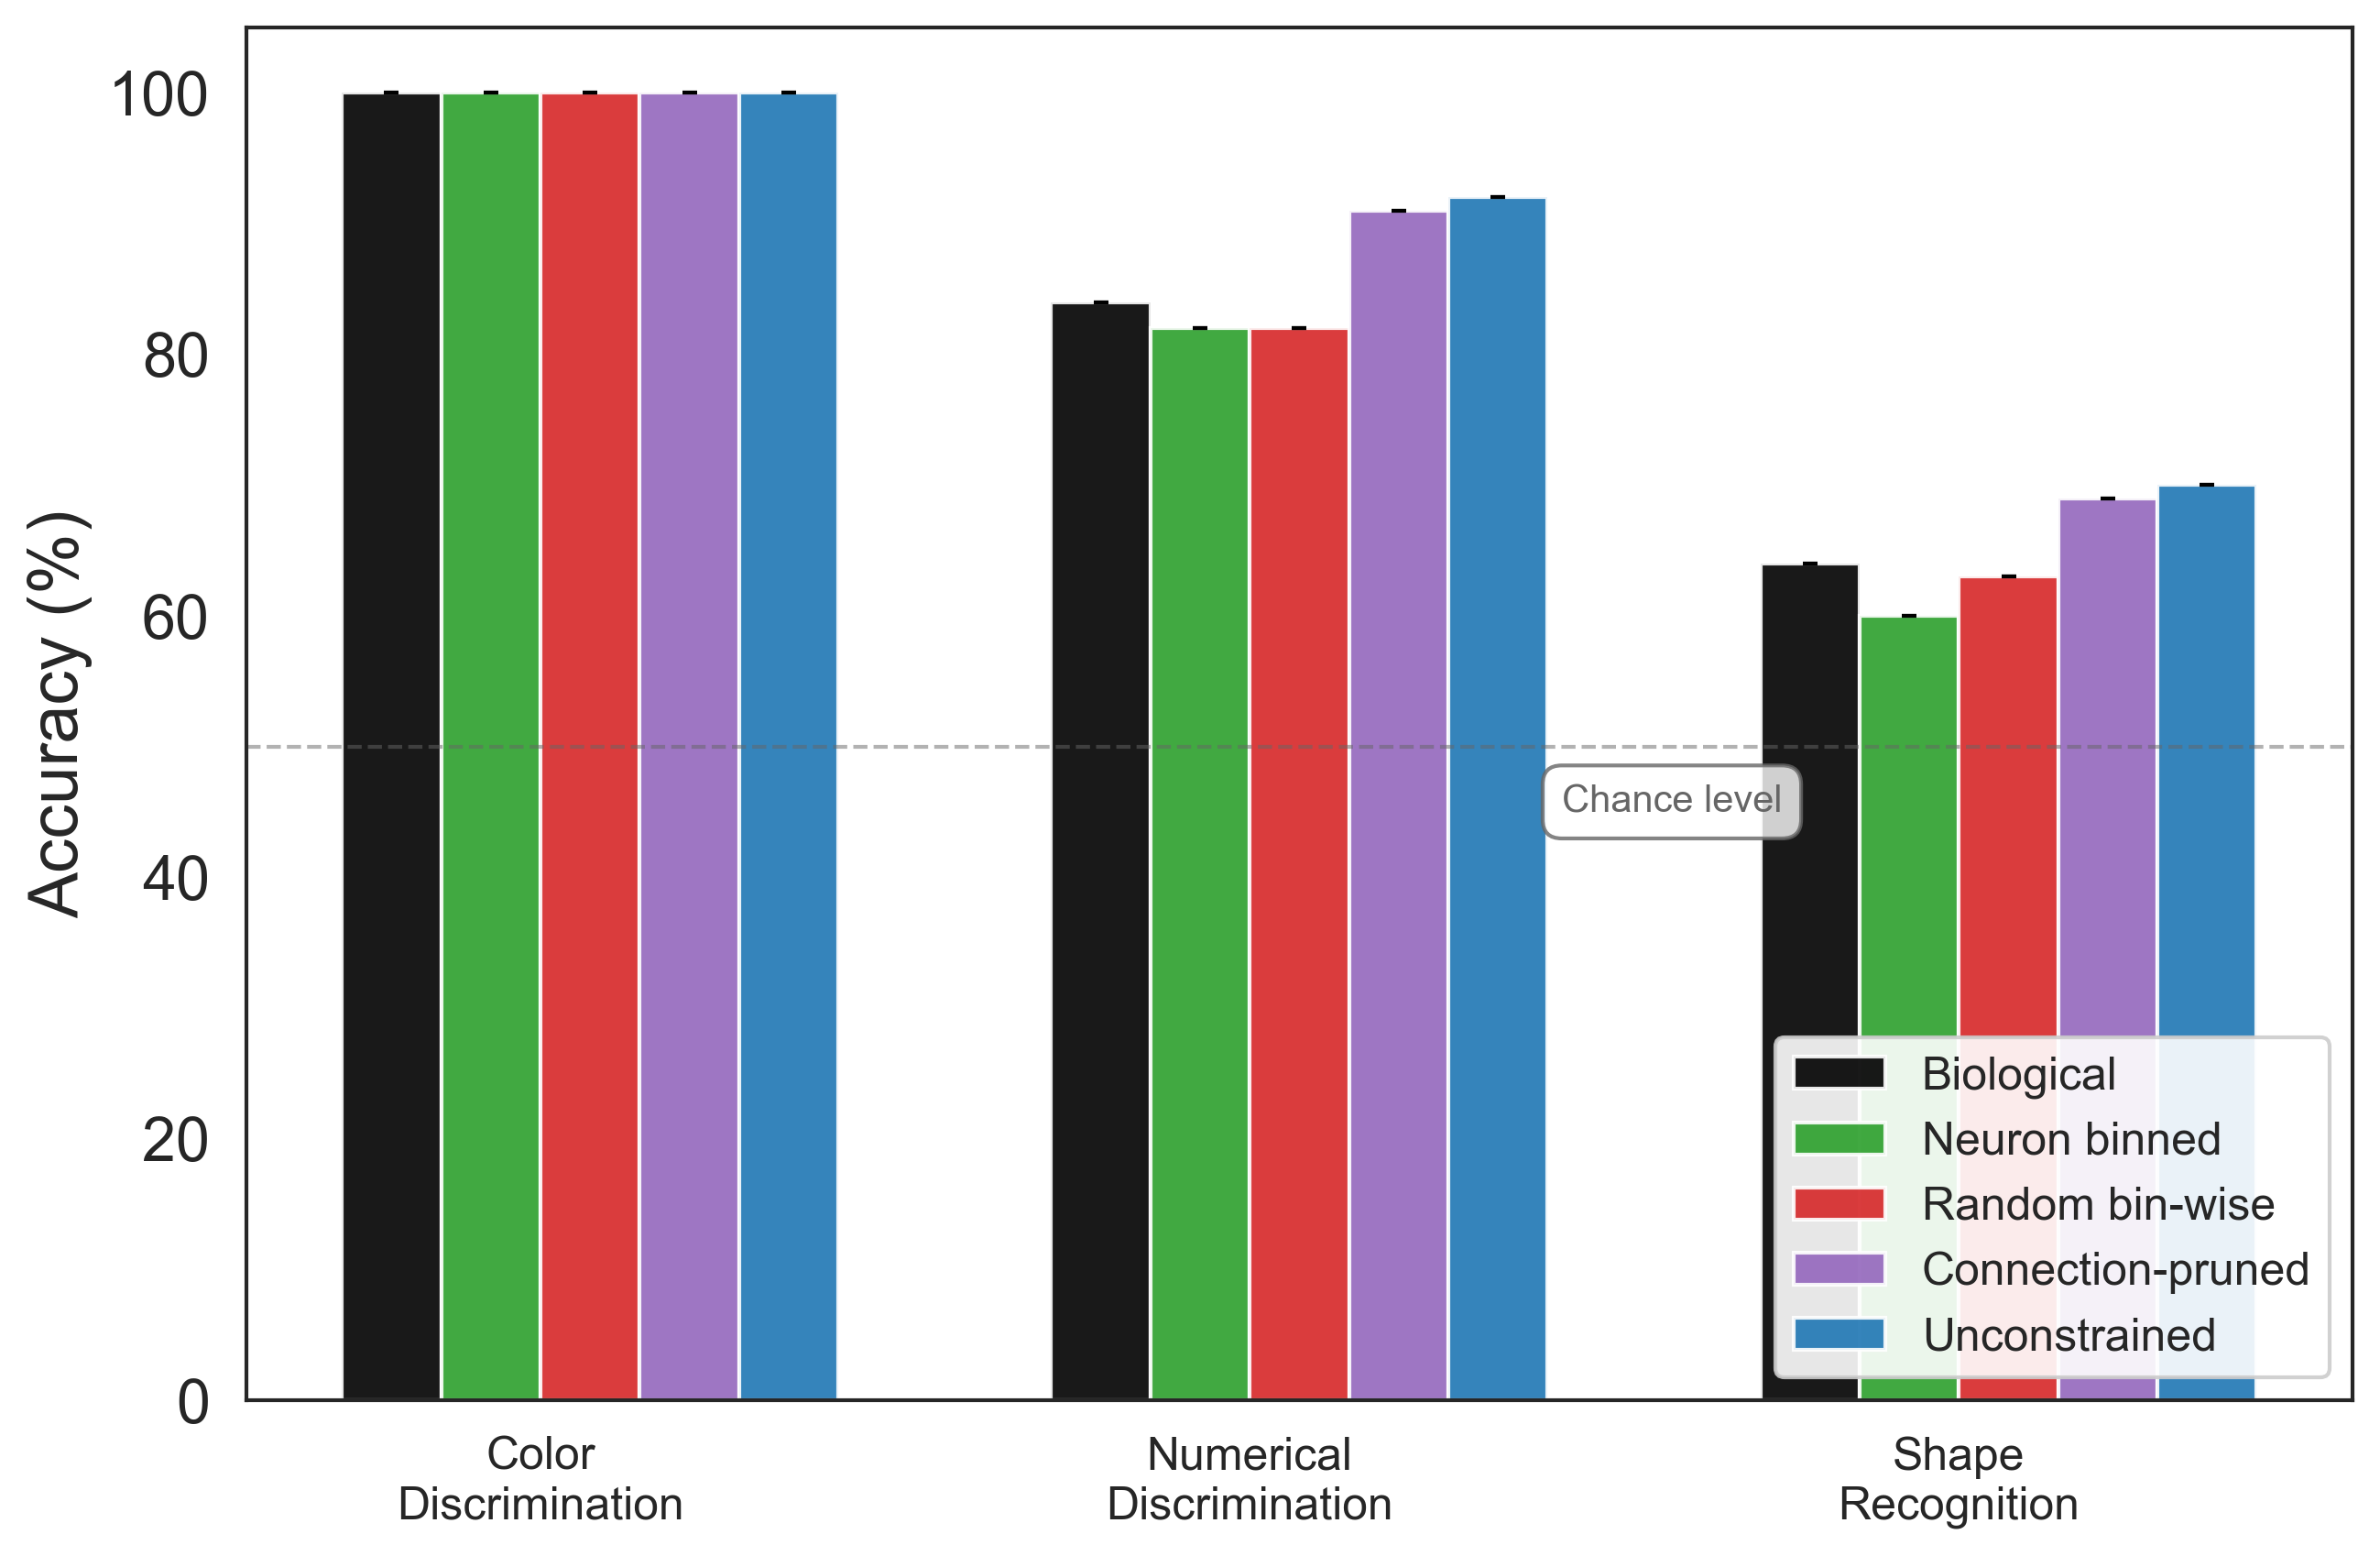

In [10]:
import importlib
from notebooks.visualization.random_networks_plots import models_accuracy
from notebooks.visualization.random_networks_plots import plot_config
importlib.reload(models_accuracy)
importlib.reload(plot_config)

from notebooks.visualization.random_networks_plots.models_accuracy import task_accuracy_comparison


figc = task_accuracy_comparison()

plt.savefig(os.path.join(plots_dir, "accuracy_comparison.png"), dpi=300, bbox_inches="tight", transparent=True)
plt.savefig(os.path.join(plots_dir, "accuracy_comparison.pdf"), bbox_inches="tight") 
plt.show()

# Panel d

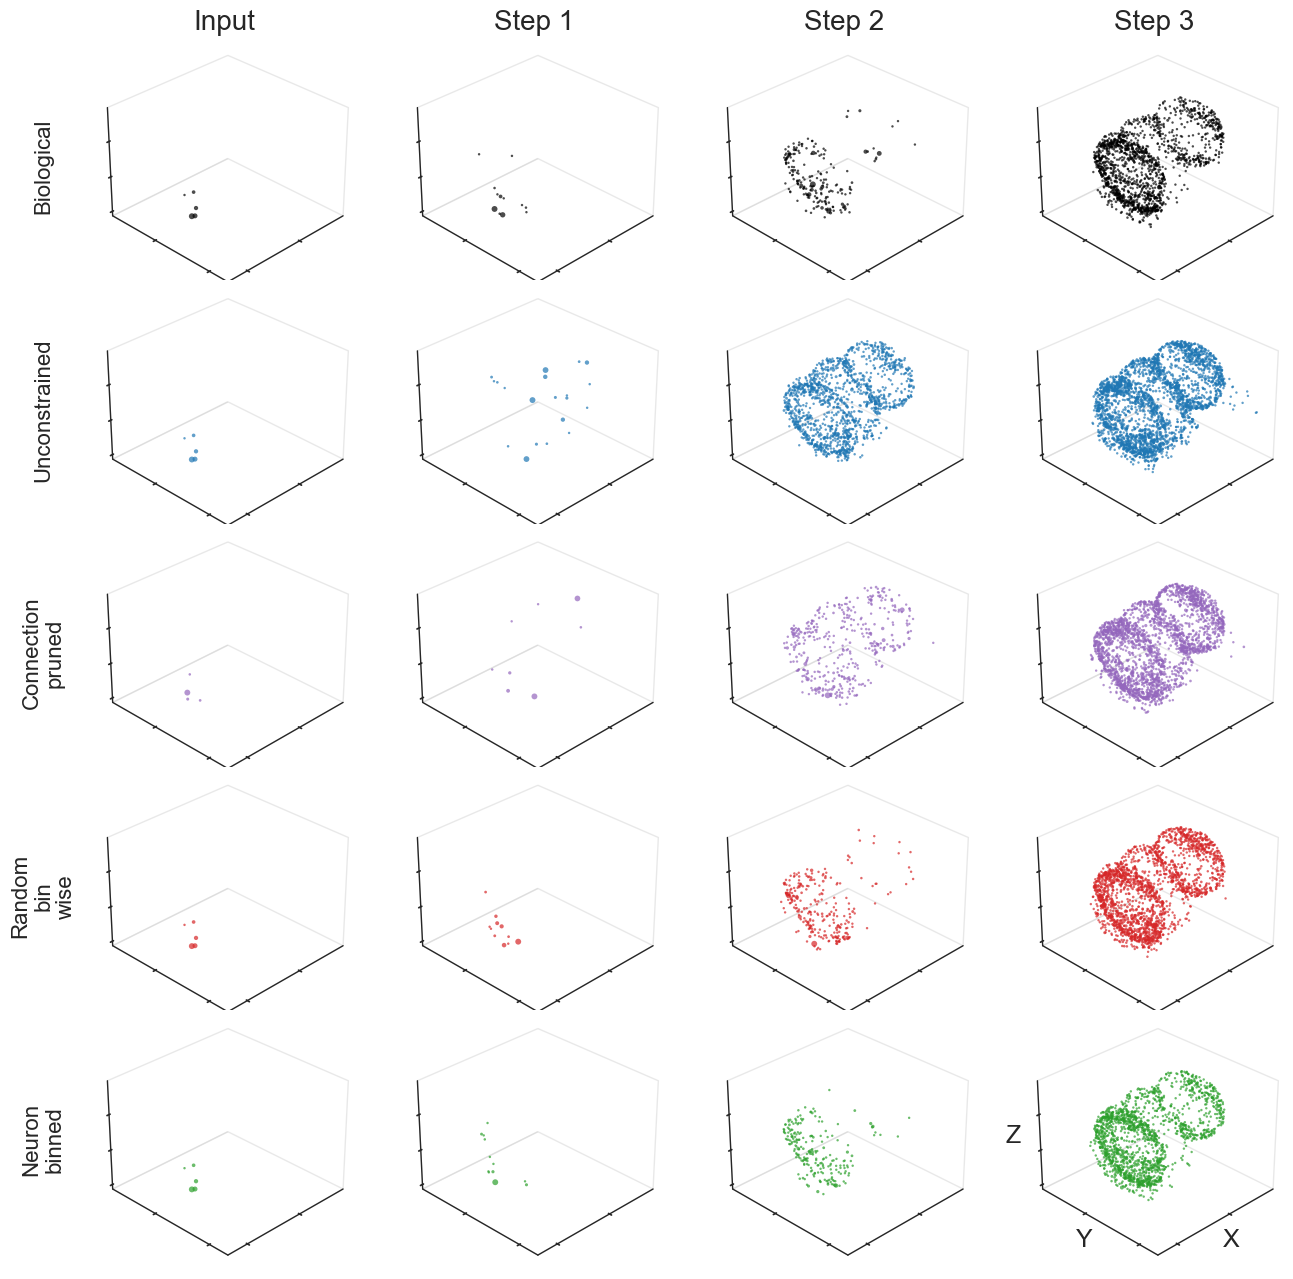

In [11]:
import importlib
from notebooks.visualization.random_networks_plots import activation_plots
importlib.reload(activation_plots)
from notebooks.visualization.random_networks_plots.activation_plots import visualize_steps_separated_compact

figd = visualize_steps_separated_compact(
    activations_dict,
    neuron_position_data,
    num_steps=3,
    max_neurons_percentage=2,
    padding_percent=5,
    figsize=(20, 16),
)

# Save figure with transparent background (Nature preference)
figd.savefig(os.path.join(plots_dir, "activation_evolution.png"), dpi=300, bbox_inches="tight", transparent=True)
figd.savefig(os.path.join(plots_dir, "activation_evolution.pdf"), bbox_inches="tight") 
plt.show()

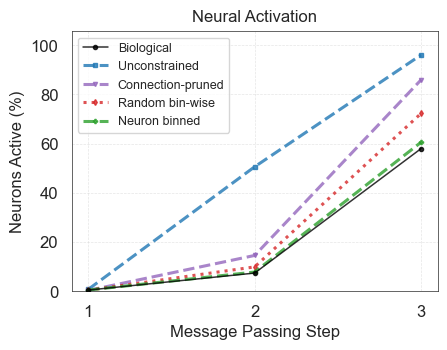

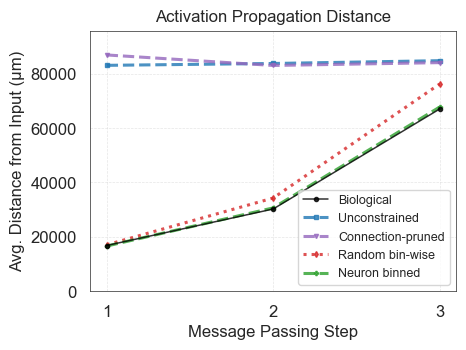

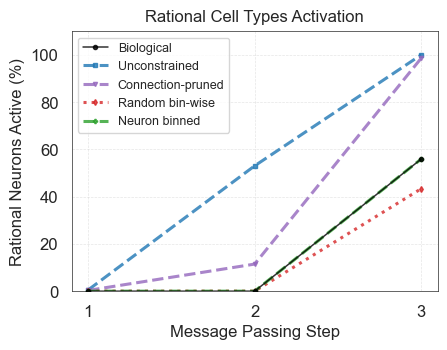

In [12]:
import importlib
from notebooks.visualization.random_networks_plots import activation_plots
importlib.reload(activation_plots)
from notebooks.visualization.random_networks_plots.activation_plots import plot_activation_statistics

fig5, fig6, fig7 = plot_activation_statistics(activations_dict, neuron_position_data, num_steps=3)
fig5.savefig(os.path.join(plots_dir, "neuron_activation.png"), dpi=300, bbox_inches="tight")
fig5.savefig(os.path.join(plots_dir, "neuron_activation.pdf"), bbox_inches="tight")
fig6.savefig(os.path.join(plots_dir, "propagation_distance.png"), dpi=300, bbox_inches="tight")
fig6.savefig(os.path.join(plots_dir, "propagation_distance.pdf"), bbox_inches="tight")
fig7.savefig(os.path.join(plots_dir, "thinking_neuron_activation.png"), dpi=300, bbox_inches="tight")
fig7.savefig(os.path.join(plots_dir, "thinking_neuron_activation.pdf"), bbox_inches="tight")
plt.show()

# All together

/tmp/ipykernel_20719/2162340181.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


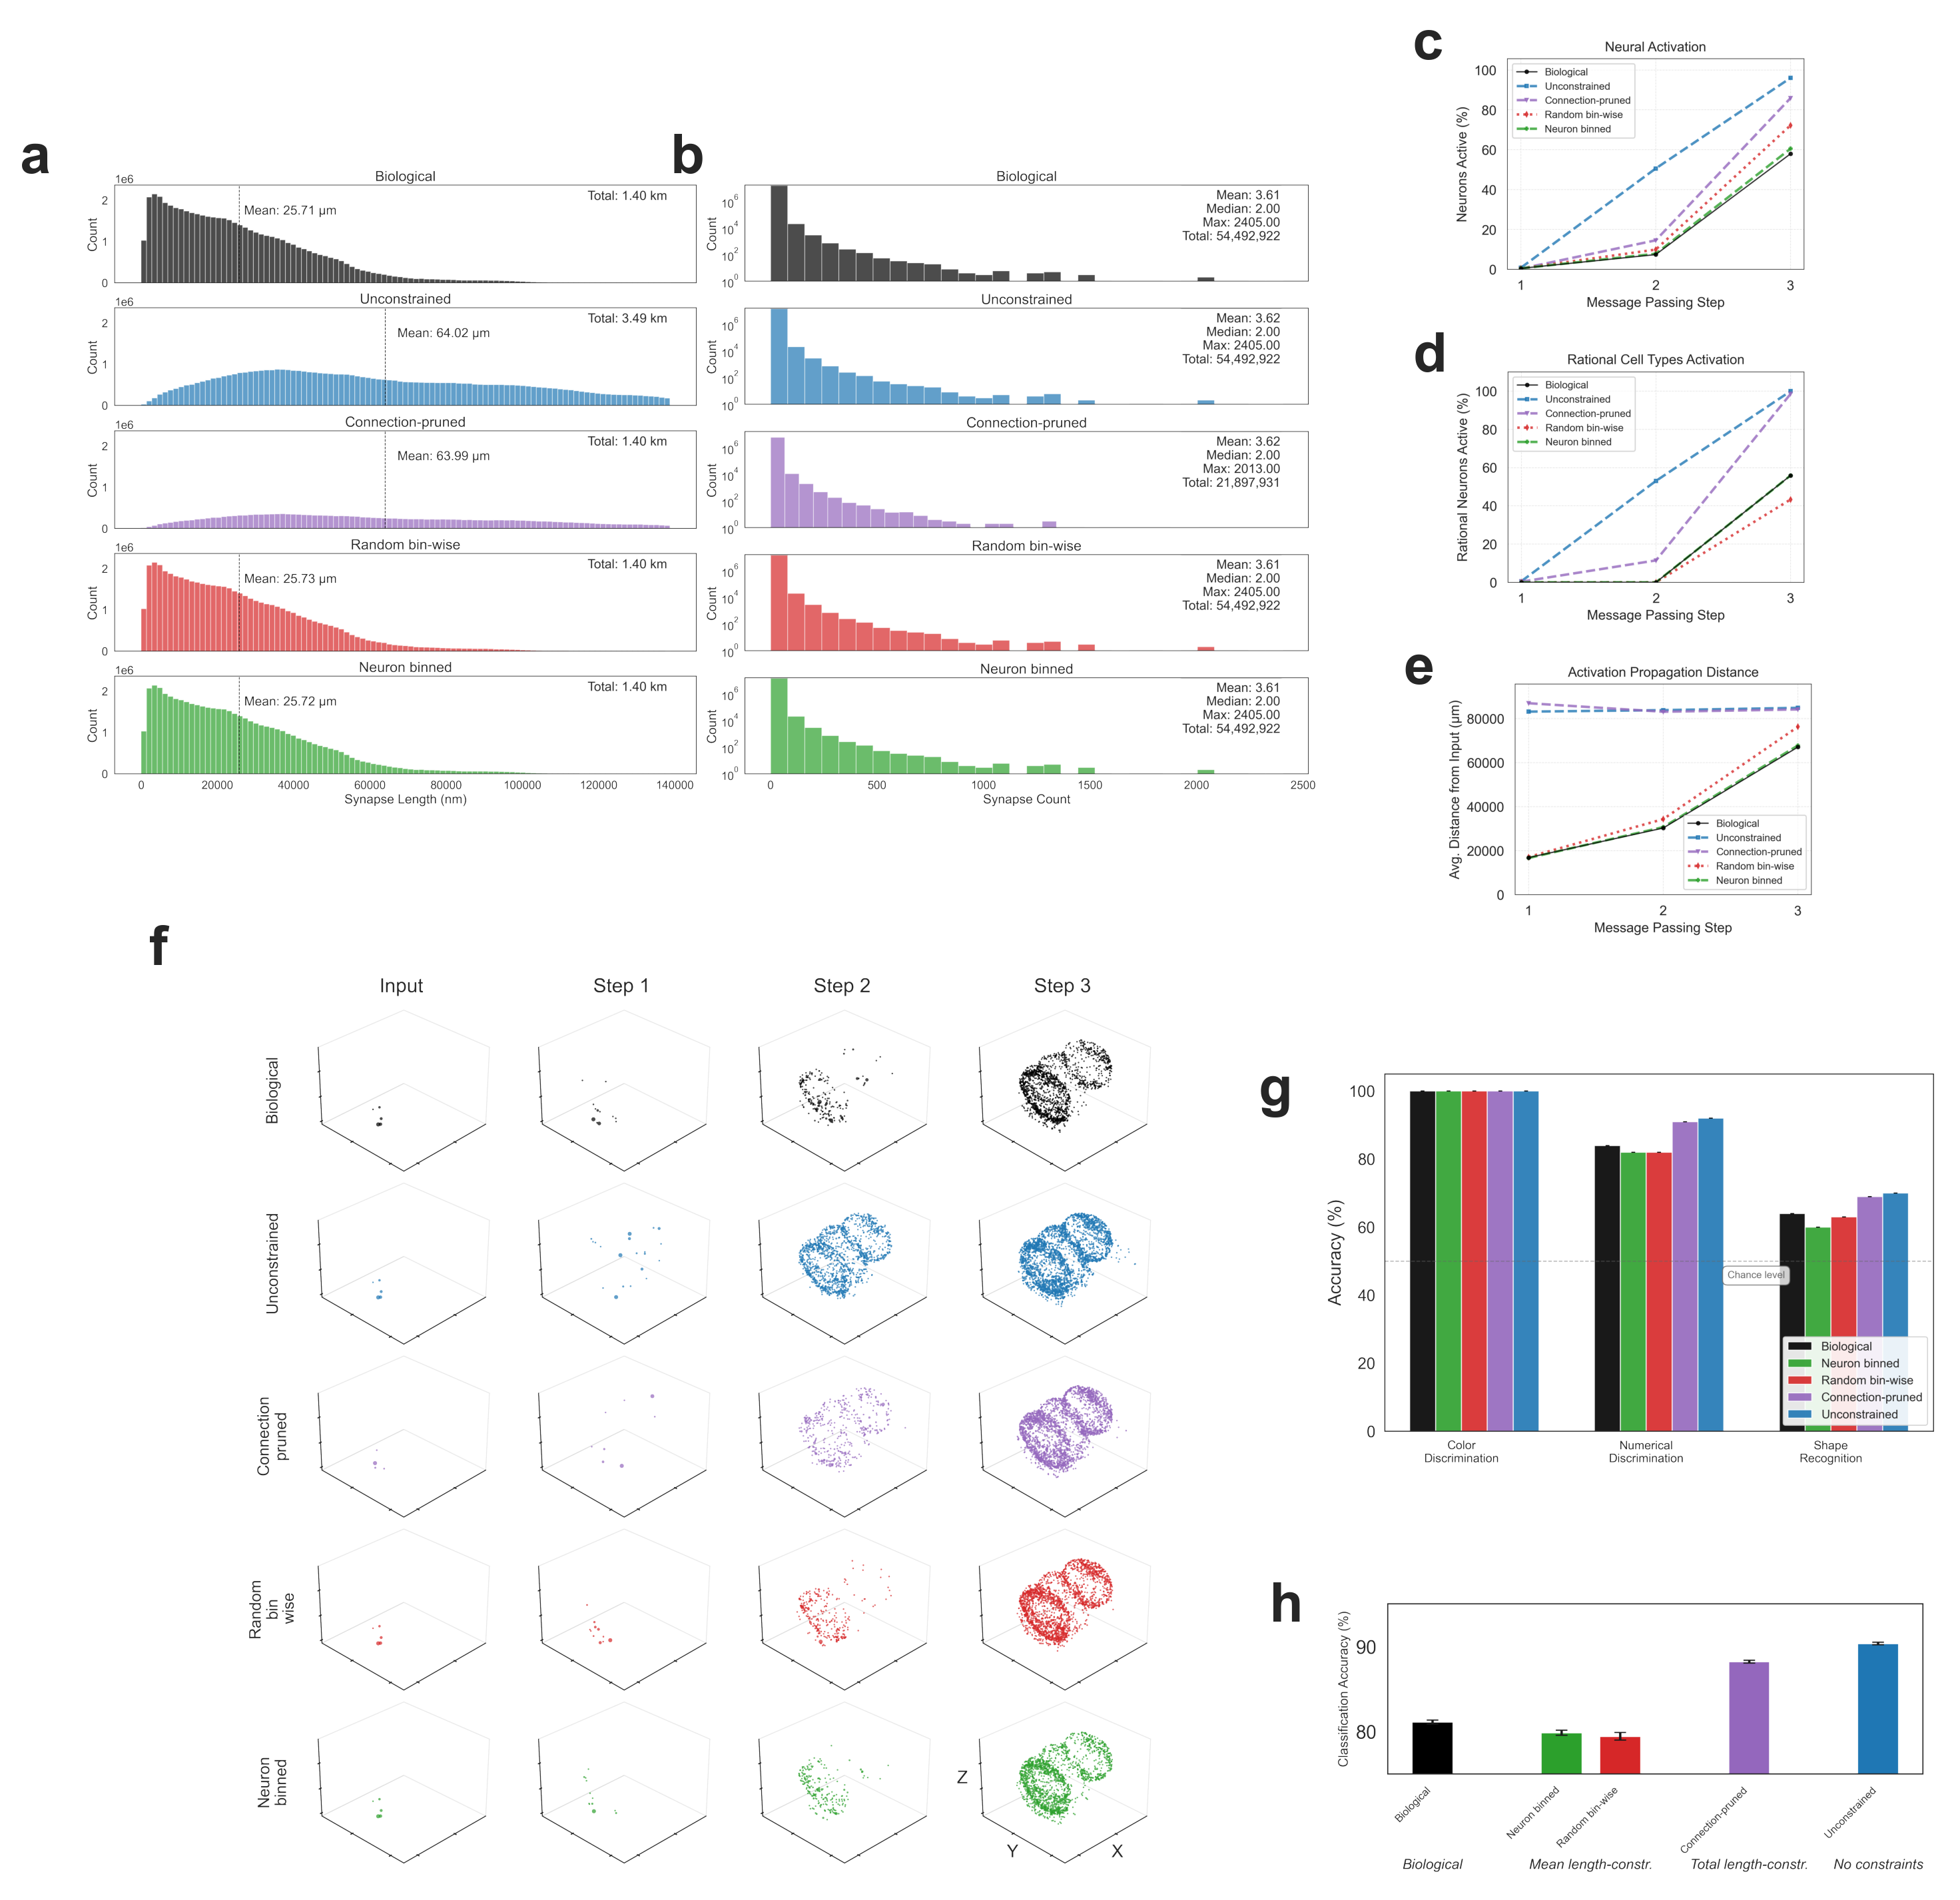

In [18]:
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg

# Create the composite figure
fig = plt.figure(figsize=(12, 12), dpi=300)
gs = GridSpec(6, 3, figure=fig, wspace=0., hspace=0.1)

# Define subplot areas
## Upper row
ax1 = fig.add_subplot(gs[:3, 0])
ax2 = fig.add_subplot(gs[:3, 1])

# Upper right block
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 2])
ax5 = fig.add_subplot(gs[2, 2])

# Lower block
## Big block
ax6 = fig.add_subplot(gs[3:6, 0:2])

## Bottom-right column 
ax7 = fig.add_subplot(gs[3:5, 2])
ax8 = fig.add_subplot(gs[5, 2])


# Load the images
dir_path = os.path.join(PROJECT_ROOT, "plots")
ax1.imshow(mpimg.imread(os.path.join(dir_path, "synapse_length_distributions.png")))
ax2.imshow(mpimg.imread(os.path.join(dir_path, "synapse_counts_histogram.png")))

ax3.imshow(mpimg.imread(os.path.join(dir_path, "neuron_activation.png")))
ax4.imshow(mpimg.imread(os.path.join(dir_path, "thinking_neuron_activation.png")))
ax5.imshow(mpimg.imread(os.path.join(dir_path, "propagation_distance.png")))

ax6.imshow(mpimg.imread(os.path.join(dir_path, "activation_evolution.png")))
ax7.imshow(mpimg.imread(os.path.join(dir_path, "accuracy_comparison.png")))
ax8.imshow(mpimg.imread(os.path.join(dir_path, "efficiency_comparison.png")))

for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    ax.axis("off")

# Add panel labels with improved positioning
label_params = {"fontsize": 20, "fontweight": "bold", "va": "top", "ha": "left"}

ax1.text(-0.1, 1.05, "a", transform=ax1.transAxes, **label_params)
ax2.text(-0.05, 1.05, "b", transform=ax2.transAxes, **label_params)
ax3.text(-0.1, 1.05, "c", transform=ax3.transAxes, **label_params)
ax4.text(-0.1, 1.05, "d", transform=ax4.transAxes, **label_params)
ax5.text(-0.1, 1.05, "e", transform=ax5.transAxes, **label_params)
ax6.text(-0.1, 1.05, "f", transform=ax6.transAxes, **label_params)
ax7.text(-0.1, 1.0, "g", transform=ax7.transAxes, **label_params)
ax8.text(-0.1, 1.05, "h", transform=ax8.transAxes, **label_params)

plt.tight_layout()

# save
plt.savefig(
    os.path.join(plots_dir, "figure2_panel.png"),
    dpi=300,
    bbox_inches="tight",
)
plt.savefig(
    os.path.join(plots_dir, "figure2_panel.pdf"), bbox_inches="tight"
)

plt.show()